In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
cd /content/drive/MyDrive/My_LGE_challenege

/content/drive/MyDrive/My_LGE_challenege


In [ ]:
import os
import nibabel as nib
import random
import numpy as np
import pandas as pd
train_path='/content/drive/MyDrive/My_LGE_challenege/dataset_train_test/images'
train_data = os.listdir(train_path)
data = {
    'patient': [],
    'channel': []
}
patsave='/content/drive/MyDrive/My_LGE_challenege'
for patient in sorted(train_data):
    image_path = f'{train_path}/{patient}'
    #print(image_path)
    #break
    img = nib.load(image_path)
    channels = img.shape[-1]
    for channel in range(channels):
        data['patient'] += [patient]
        #data['image'] += [f]
        data['channel'] += [channel]
        #break
    #break
  
#df = pd.DataFrame(data)
#ix=0
#patient = df.iloc[ix].patient
#image = self.data.iloc[ix].image
#channel = df.iloc[ix].channel   

#img = nib.load(f'{train_path}/{patient}').get_fdata()[...,channel]
#mask = nib.load(f'{pathmask}/{patient}').get_fdata()[...,channel].astype(np.int)

import pandas as pd 

df = pd.DataFrame(data)
#df
df.to_csv(os.path.join(patsave,'training_data.csv'), index=False)

/content/drive/MyDrive/My_LGE_challenege/dataset_train_test/images/001_D8.nii.gz
/content/drive/MyDrive/My_LGE_challenege/dataset_train_test/images/001_M1.nii.gz
/content/drive/MyDrive/My_LGE_challenege/dataset_train_test/images/001_M12.nii.gz
/content/drive/MyDrive/My_LGE_challenege/dataset_train_test/images/002_D8.nii.gz
/content/drive/MyDrive/My_LGE_challenege/dataset_train_test/images/002_M1.nii.gz
/content/drive/MyDrive/My_LGE_challenege/dataset_train_test/images/002_M12.nii.gz
/content/drive/MyDrive/My_LGE_challenege/dataset_train_test/images/003_D8.nii.gz
/content/drive/MyDrive/My_LGE_challenege/dataset_train_test/images/003_M12.nii.gz
/content/drive/MyDrive/My_LGE_challenege/dataset_train_test/images/004_D8.nii.gz
/content/drive/MyDrive/My_LGE_challenege/dataset_train_test/images/004_M1.nii.gz
/content/drive/MyDrive/My_LGE_challenege/dataset_train_test/images/004_M12.nii.gz
/content/drive/MyDrive/My_LGE_challenege/dataset_train_test/images/005_D8.nii.gz
/content/drive/MyDrive/M

In [ ]:
import pandas as pd 
df = pd.DataFrame(data)
#df
df.to_csv(os.path.join(patsave,'training_data.csv'), index=False)

In [ ]:
#%% da
import torch
import nibabel as nib
from torch.utils.data import DataLoader
#import pytorch_lightning as pl
import albumentations as A
import numpy as np
import pandas as pd

class Dataset(torch.utils.data.Dataset):
    def __init__(self, path, data,pathmask, trans=None):
        self.path = path
        self.data = data
        self.pathmask=pathmask
        self.trans = trans
        self.num_classes = 5
        self.max_val = {
            'LA_ED': 4104.,
            'LA_ES': 7875.,
            'SA_ED': 11510.,
            'SA_ES': 9182.
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, ix):
        patient = self.data.iloc[ix].patient
        #image = self.data.iloc[ix].image
        channel = self.data.iloc[ix].channel
        #img = nib.load(f'{self.path}/{patient}').get_fdata()[...,channel] / self.max_val[image]
        #mask = nib.load(f'{self.pathmask}/{patient}').get_fdata()[...,channel].astype(np.int)
        img = nib.load(f'{self.path}/{patient}').get_fdata()[...,channel]
        mask = nib.load(f'{self.pathmask}/{patient}').get_fdata()[...,channel].astype(np.int)
        if self.trans:
            t = self.trans(image=img, mask=mask)
            img = t['image']
            mask = t['mask'] 
        img_t = torch.from_numpy(img).float().unsqueeze(0)
        # mask encoding
        mask_oh = torch.nn.functional.one_hot(torch.from_numpy(mask).long(), self.num_classes).permute(2,0,1).float()
        return img_t, mask_oh    

pathdata='/content/drive/MyDrive/My_LGE_challenege/training_data.csv'
pathmask='/content/drive/MyDrive/My_LGE_challenege/dataset_train_test/labels'
pathim='/content/drive/MyDrive/My_LGE_challenege/dataset_train_test/images'
data=pd.read_csv(pathdata)
# patient = data.iloc[0].patient
# #image = self.data.iloc[ix].image
# channel = data.iloc[0].channel
import albumentations as A

trans = A.Compose([
    A.Resize(96, 96)
])

ds=Dataset(pathim,data,pathmask,trans=trans)
img,mask=ds[0]

<ipython-input-7-7a263ea55ac5>:34: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = nib.load(f'{self.pathmask}/{patient}').get_fdata()[...,channel].astype(np.int)


<ipython-input-7-7a263ea55ac5>:34: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = nib.load(f'{self.pathmask}/{patient}').get_fdata()[...,channel].astype(np.int)


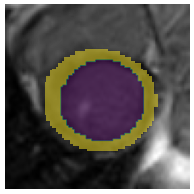

In [ ]:
import matplotlib.pyplot as plt
import random

ix = random.randint(0, len(ds))
img, mask = ds[ix]
fig, ax = plt.subplots(dpi=50)
ax.imshow(img[0], cmap="gray")
ax.axis('off')
mask = torch.argmax(mask, axis=0).float().numpy()
mask[mask == 0] = np.nan
ax.imshow(mask, alpha=0.5)
plt.show()

In [ ]:
dl = torch.utils.data.DataLoader(ds, batch_size=10, shuffle=False)
imgs, masks = next(iter(dl))
imgs.shape, masks.shape

<ipython-input-7-7a263ea55ac5>:34: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = nib.load(f'{self.pathmask}/{patient}').get_fdata()[...,channel].astype(np.int)


(torch.Size([10, 1, 96, 96]), torch.Size([10, 5, 96, 96]))

In [ ]:
#%% model define
### model########################
import torch.nn.functional as F

def conv3x3_bn(ci, co):
    return torch.nn.Sequential(
        torch.nn.Conv2d(ci, co, 3, padding=1),
        torch.nn.BatchNorm2d(co),
        torch.nn.ReLU(inplace=True)
    )

def encoder_conv(ci, co):
    return torch.nn.Sequential(
        torch.nn.MaxPool2d(2),
        conv3x3_bn(ci, co),
        conv3x3_bn(co, co),
    )

class deconv(torch.nn.Module):
    def __init__(self, ci, co):
        super(deconv, self).__init__()
        self.upsample = torch.nn.ConvTranspose2d(ci, co, 2, stride=2)
        self.conv1 = conv3x3_bn(ci, co)
        self.conv2 = conv3x3_bn(co, co)
    
    # recibe la salida de la capa anetrior y la salida de la etapa
    # correspondiente del encoder
    def forward(self, x1, x2):
        x1 = self.upsample(x1)
        diffX = x2.size()[2] - x1.size()[2]
        diffY = x2.size()[3] - x1.size()[3]
        x1 = F.pad(x1, (diffX, 0, diffY, 0))
        # concatenamos los tensores
        x = torch.cat([x2, x1], dim=1)
        x = self.conv1(x)
        x = self.conv2(x)
        return x
    
class UNet(torch.nn.Module):
    def __init__(self, n_classes=5, in_ch=1):
        super().__init__()

        # lista de capas en encoder-decoder con número de filtros
        c = [16, 32, 64, 128]

        # primera capa conv que recibe la imagen
        self.conv1 = torch.nn.Sequential(
          conv3x3_bn(in_ch, c[0]),
          conv3x3_bn(c[0], c[0]),
        )
        # capas del encoder
        self.conv2 = encoder_conv(c[0], c[1])
        self.conv3 = encoder_conv(c[1], c[2])
        self.conv4 = encoder_conv(c[2], c[3])

        # capas del decoder
        self.deconv1 = deconv(c[3],c[2])
        self.deconv2 = deconv(c[2],c[1])
        self.deconv3 = deconv(c[1],c[0])

        # útlima capa conv que nos da la máscara
        self.out = torch.nn.Conv2d(c[0], n_classes, 3, padding=1)

    def forward(self, x):
        # encoder
        x1 = self.conv1(x)
        x2 = self.conv2(x1)
        x3 = self.conv3(x2)
        x = self.conv4(x3)
        # decoder
        x = self.deconv1(x, x3)
        x = self.deconv2(x, x2)
        x = self.deconv3(x, x1)
        x = self.out(x)
        return x
    
unet = UNet()

output = unet(imgs)
output.shape, masks.shape

(torch.Size([10, 5, 96, 96]), torch.Size([10, 5, 96, 96]))

In [ ]:
dl = torch.utils.data.DataLoader(ds, batch_size=10, shuffle=False)
unet = UNet()

##################### dataloader ####################
from tqdm import tqdm

epochs = 200
lr = 1e-3
optimizer = torch.optim.Adam(unet.parameters(), lr=lr)

for e in range(1, epochs+1):
    unet.train()
    l = []
    for batch in tqdm(dl):
        optimizer.zero_grad()
        imgs, masks = batch
        preds = unet(imgs)
        loss = F.binary_cross_entropy_with_logits(preds, masks)
        loss.backward()
        optimizer.step()
        l.append(loss.item())
        break
    print(f'Epoch {e}/{epochs} loss {np.mean(l):.4f}')

  0%|          | 0/699 [00:00<?, ?it/s]<ipython-input-7-7a263ea55ac5>:34: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = nib.load(f'{self.pathmask}/{patient}').get_fdata()[...,channel].astype(np.int)
  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 1/200 loss 0.8065


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 2/200 loss 0.7639


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 3/200 loss 0.7306


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 4/200 loss 0.7032


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 5/200 loss 0.6795


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 6/200 loss 0.6573


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 7/200 loss 0.6358


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 8/200 loss 0.6141


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 9/200 loss 0.5920


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 10/200 loss 0.5699


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 11/200 loss 0.5479


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 12/200 loss 0.5273


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 13/200 loss 0.5066


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 14/200 loss 0.4850


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 15/200 loss 0.4638


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 16/200 loss 0.4429


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 17/200 loss 0.4224


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 18/200 loss 0.4028


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 19/200 loss 0.3841


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 20/200 loss 0.3671


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 21/200 loss 0.3507


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 22/200 loss 0.3350


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 23/200 loss 0.3203


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 24/200 loss 0.3068


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 25/200 loss 0.2930


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 26/200 loss 0.2802


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 27/200 loss 0.2686


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 28/200 loss 0.2571


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 29/200 loss 0.2469


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 30/200 loss 0.2366


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 31/200 loss 0.2275


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 32/200 loss 0.2182


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 33/200 loss 0.2099


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 34/200 loss 0.2017


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 35/200 loss 0.1941


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 36/200 loss 0.1870


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 37/200 loss 0.1802


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 38/200 loss 0.1738


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 39/200 loss 0.1678


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 40/200 loss 0.1620


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 41/200 loss 0.1567


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 42/200 loss 0.1516


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 43/200 loss 0.1466


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 44/200 loss 0.1422


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 45/200 loss 0.1380


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 46/200 loss 0.1339


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 47/200 loss 0.1304


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 48/200 loss 0.1265


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 49/200 loss 0.1223


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 50/200 loss 0.1193


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 51/200 loss 0.1157


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 52/200 loss 0.1127


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 53/200 loss 0.1097


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 54/200 loss 0.1067


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 55/200 loss 0.1041


  0%|          | 0/699 [00:01<?, ?it/s]


Epoch 56/200 loss 0.1013


  0%|          | 0/699 [00:01<?, ?it/s]


Epoch 57/200 loss 0.0990


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 58/200 loss 0.0964


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 59/200 loss 0.0943


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 60/200 loss 0.0919


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 61/200 loss 0.0900


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 62/200 loss 0.0880


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 63/200 loss 0.0862


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 64/200 loss 0.0842


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 65/200 loss 0.0823


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 66/200 loss 0.0806


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 67/200 loss 0.0790


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 68/200 loss 0.0774


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 69/200 loss 0.0758


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 70/200 loss 0.0744


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 71/200 loss 0.0730


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 72/200 loss 0.0717


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 73/200 loss 0.0704


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 74/200 loss 0.0692


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 75/200 loss 0.0683


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 76/200 loss 0.0676


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 77/200 loss 0.0666


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 78/200 loss 0.0649


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 79/200 loss 0.0640


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 80/200 loss 0.0629


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 81/200 loss 0.0616


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 82/200 loss 0.0610


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 83/200 loss 0.0598


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 84/200 loss 0.0589


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 85/200 loss 0.0582


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 86/200 loss 0.0571


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 87/200 loss 0.0565


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 88/200 loss 0.0556


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 89/200 loss 0.0549


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 90/200 loss 0.0541


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 91/200 loss 0.0533


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 92/200 loss 0.0527


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 93/200 loss 0.0520


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 94/200 loss 0.0514


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 95/200 loss 0.0506


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 96/200 loss 0.0500


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 97/200 loss 0.0494


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 98/200 loss 0.0488


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 99/200 loss 0.0483


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 100/200 loss 0.0477


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 101/200 loss 0.0471


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 102/200 loss 0.0466


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 103/200 loss 0.0461


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 104/200 loss 0.0457


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 105/200 loss 0.0459


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 106/200 loss 0.0466


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 107/200 loss 0.0467


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 108/200 loss 0.0440


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 109/200 loss 0.0450


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 110/200 loss 0.0432


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 111/200 loss 0.0434


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 112/200 loss 0.0425


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 113/200 loss 0.0423


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 114/200 loss 0.0416


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 115/200 loss 0.0412


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 116/200 loss 0.0408


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 117/200 loss 0.0404


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 118/200 loss 0.0400


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 119/200 loss 0.0395


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 120/200 loss 0.0392


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 121/200 loss 0.0388


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 122/200 loss 0.0384


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 123/200 loss 0.0380


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 124/200 loss 0.0377


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 125/200 loss 0.0374


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 126/200 loss 0.0370


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 127/200 loss 0.0366


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 128/200 loss 0.0364


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 129/200 loss 0.0360


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 130/200 loss 0.0357


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 131/200 loss 0.0354


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 132/200 loss 0.0351


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 133/200 loss 0.0348


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 134/200 loss 0.0345


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 135/200 loss 0.0342


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 136/200 loss 0.0340


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 137/200 loss 0.0337


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 138/200 loss 0.0334


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 139/200 loss 0.0332


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 140/200 loss 0.0330


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 141/200 loss 0.0328


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 142/200 loss 0.0326


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 143/200 loss 0.0324


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 144/200 loss 0.0320


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 145/200 loss 0.0316


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 146/200 loss 0.0313


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 147/200 loss 0.0311


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 148/200 loss 0.0309


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 149/200 loss 0.0306


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 150/200 loss 0.0303


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 151/200 loss 0.0301


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 152/200 loss 0.0299


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 153/200 loss 0.0297


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 154/200 loss 0.0294


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 155/200 loss 0.0292


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 156/200 loss 0.0292


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 157/200 loss 0.0294


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 158/200 loss 0.0297


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 159/200 loss 0.0293


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 160/200 loss 0.0282


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 161/200 loss 0.0284


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 162/200 loss 0.0282


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 163/200 loss 0.0275


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 164/200 loss 0.0278


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 165/200 loss 0.0272


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 166/200 loss 0.0271


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 167/200 loss 0.0269


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 168/200 loss 0.0266


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 169/200 loss 0.0265


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 170/200 loss 0.0261


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 171/200 loss 0.0261


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 172/200 loss 0.0258


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 173/200 loss 0.0256


  0%|          | 0/699 [00:01<?, ?it/s]


Epoch 174/200 loss 0.0254


  0%|          | 0/699 [00:02<?, ?it/s]


Epoch 175/200 loss 0.0252


  0%|          | 0/699 [00:01<?, ?it/s]


Epoch 176/200 loss 0.0251


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 177/200 loss 0.0248


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 178/200 loss 0.0247


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 179/200 loss 0.0244


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 180/200 loss 0.0242


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 181/200 loss 0.0241


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 182/200 loss 0.0238


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 183/200 loss 0.0237


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 184/200 loss 0.0235


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 185/200 loss 0.0233


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 186/200 loss 0.0231


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 187/200 loss 0.0229


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 188/200 loss 0.0228


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 189/200 loss 0.0226


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 190/200 loss 0.0224


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 191/200 loss 0.0224


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 192/200 loss 0.0226


  0%|          | 0/699 [00:01<?, ?it/s]


Epoch 193/200 loss 0.0232


  0%|          | 0/699 [00:01<?, ?it/s]


Epoch 194/200 loss 0.0239


  0%|          | 0/699 [00:01<?, ?it/s]


Epoch 195/200 loss 0.0228


  0%|          | 0/699 [00:01<?, ?it/s]


Epoch 196/200 loss 0.0216


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 197/200 loss 0.0223


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 198/200 loss 0.0212


  0%|          | 0/699 [00:00<?, ?it/s]


Epoch 199/200 loss 0.0217


  0%|          | 0/699 [00:00<?, ?it/s]

Epoch 200/200 loss 0.0209


In [ ]:
#################### test the base unet model #########################
unet.eval()
imgs, masks = next(iter(dl))
with torch.no_grad():
    preds = unet(imgs)
    
preds.shape

<ipython-input-7-7a263ea55ac5>:34: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = nib.load(f'{self.pathmask}/{patient}').get_fdata()[...,channel].astype(np.int)


torch.Size([10, 5, 96, 96])

<ipython-input-15-33ae55b5b642>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(len(imgs), 2, 2*i + 1)


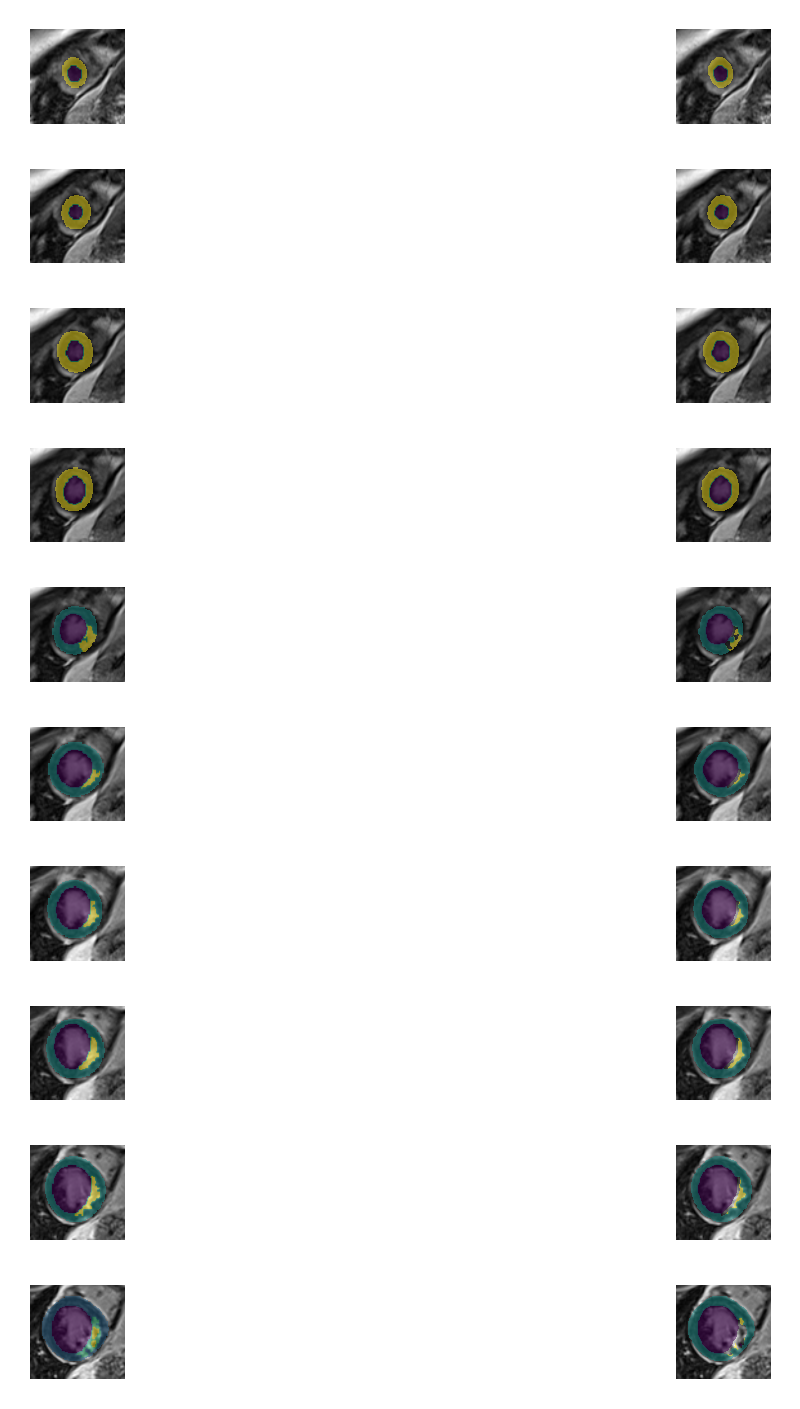

In [ ]:
fig = plt.subplots(dpi=300)
for i, (img, mask, pred) in enumerate(zip(imgs, masks, preds)):
    ax = plt.subplot(len(imgs), 2, 2*i + 1)
    ax.imshow(img[0], cmap="gray")
    mask = torch.argmax(mask, axis=0).float().numpy()
    mask[mask == 0] = np.nan
    ax.imshow(mask, alpha=0.5)
    ax.axis('off')
    ax = plt.subplot(len(imgs), 2, 2*i + 2)
    ax.imshow(img[0], cmap="gray")
    pred = torch.argmax(pred, axis=0).float().numpy()
    pred[pred == 0] = np.nan
    ax.imshow(pred, alpha=0.5)
    ax.axis('off')
plt.tight_layout()    
plt.show()

In [ ]:
###################### add patient name to split dataset into training and validation
import os
import nibabel as nib
import random
import numpy as np
import pandas as pd
train_path='/content/drive/MyDrive/My_LGE_challenege/dataset_train_test/images'
train_data = os.listdir(train_path)
data = {
    'patient': [],
    'patient_name': [],
    'channel': []
}
patsave='/content/drive/MyDrive/My_LGE_challenege'
for patient in sorted(train_data):
    image_path = f'{train_path}/{patient}'
    #print(image_path)
    #print(patient)
    patname=patient.split('_')[0]
    #print(patname)
    #break
    img = nib.load(image_path)
    channels = img.shape[-1]
    for channel in range(channels):
        data['patient'] += [patient]
        data['patient_name'] += [patname]
        data['channel'] += [channel]
        #break
    #break
  

In [ ]:
################# new_training save
import pandas as pd 

df = pd.DataFrame(data)
df
df.to_csv(os.path.join(patsave,'training_data_new.csv'), index=False)

In [ ]:
### More explorations
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/My_LGE_challenege/training_data_new.csv')
data.patient = data.patient
data

patient  patient_name  channel
0     001_D8.nii.gz             1        0
1     001_D8.nii.gz             1        1
2     001_D8.nii.gz             1        2
3     001_D8.nii.gz             1        3
4     001_D8.nii.gz             1        4
...             ...           ...      ...
6978  300_M1.nii.gz           300       15
6979  300_M1.nii.gz           300       16
6980  300_M1.nii.gz           300       17
6981  300_M1.nii.gz           300       18
6982  300_M1.nii.gz           300       19

[6983 rows x 3 columns]

In [ ]:
############################ split training and testing
limit = 200
data_train = data[data.patient_name <= limit]
data_val = data[data.patient_name > limit]

#data_train.patient_name = data_train.patient_namet.astype(str).str.zfill(3)
#data_val.patient = data_val.patient.astype(str).str.zfill(3)

In [ ]:
data_val

patient  patient_name  channel
5223  201_M1.nii.gz           201        0
5224  201_M1.nii.gz           201        1
5225  201_M1.nii.gz           201        2
5226  201_M1.nii.gz           201        3
5227  201_M1.nii.gz           201        4
...             ...           ...      ...
6978  300_M1.nii.gz           300       15
6979  300_M1.nii.gz           300       16
6980  300_M1.nii.gz           300       17
6981  300_M1.nii.gz           300       18
6982  300_M1.nii.gz           300       19

[1760 rows x 3 columns]

In [ ]:
data_train

patient  patient_name  channel
0      001_D8.nii.gz             1        0
1      001_D8.nii.gz             1        1
2      001_D8.nii.gz             1        2
3      001_D8.nii.gz             1        3
4      001_D8.nii.gz             1        4
...              ...           ...      ...
5218  200_M12.nii.gz           200       15
5219  200_M12.nii.gz           200       16
5220  200_M12.nii.gz           200       17
5221  200_M12.nii.gz           200       18
5222  200_M12.nii.gz           200       19

[5223 rows x 3 columns]

In [ ]:
#%%  ################################# dataloader ###########################
import torch
import nibabel as nib
from torch.utils.data import DataLoader
#import pytorch_lightning as pl
import albumentations as A
import numpy as np
import pandas as pd

class Dataset(torch.utils.data.Dataset):
    def __init__(self, path, data,pathmask, trans=None):
        self.path = path
        self.data = data
        self.pathmask=pathmask
        self.trans = trans
        self.num_classes = 5
    def __len__(self):
        return len(self.data)

    def __getitem__(self, ix):
        patient = self.data.iloc[ix].patient
        #image = self.data.iloc[ix].image
        channel = self.data.iloc[ix].channel
        #img = nib.load(f'{self.path}/{patient}').get_fdata()[...,channel] / self.max_val[image]
        #mask = nib.load(f'{self.pathmask}/{patient}').get_fdata()[...,channel].astype(np.int)
        img = nib.load(f'{self.path}/{patient}').get_fdata()[...,channel]
        mask = nib.load(f'{self.pathmask}/{patient}').get_fdata()[...,channel].astype(np.int)
        if self.trans:
            t = self.trans(image=img, mask=mask)
            img = t['image']
            mask = t['mask'] 
        img_t = torch.from_numpy(img).float().unsqueeze(0)
        # mask encoding
        mask_oh = torch.nn.functional.one_hot(torch.from_numpy(mask).long(), self.num_classes).permute(2,0,1).float()
        return img_t, mask_oh    

pathdata='/content/drive/MyDrive/My_LGE_challenege/training_data.csv'
pathmask='/content/drive/MyDrive/My_LGE_challenege/dataset_train_test/labels'
pathim='/content/drive/MyDrive/My_LGE_challenege/dataset_train_test/images'
#data=pd.read_csv(pathdata)
# patient = data.iloc[0].patient
# #image = self.data.iloc[ix].image
# channel = data.iloc[0].channel
import albumentations as A

trans = A.Compose([
    A.Resize(96, 96)
])

data_train=Dataset(pathim,data_train,pathmask,trans=trans)
#img,mask=ds[0]

data_val=Dataset(pathim,data_val,pathmask,trans=trans)

In [ ]:
ds = {
    'train': data_train,
    'val': data_val
}

img, mask = ds['train'][0]
img.shape, mask.shape

<ipython-input-30-340c1a921701>:34: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = nib.load(f'{self.pathmask}/{patient}').get_fdata()[...,channel].astype(np.int)


(torch.Size([1, 96, 96]), torch.Size([5, 96, 96]))

In [ ]:
dl = {
    'train': torch.utils.data.DataLoader(ds['train'], batch_size=25, shuffle=True, pin_memory=True),
    'val': torch.utils.data.DataLoader(ds['val'], batch_size=25, shuffle=False, pin_memory=True),
}
imgs, masks = next(iter(dl['train']))
imgs.shape, masks.shape

<ipython-input-30-340c1a921701>:34: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = nib.load(f'{self.pathmask}/{patient}').get_fdata()[...,channel].astype(np.int)


(torch.Size([25, 1, 96, 96]), torch.Size([25, 5, 96, 96]))

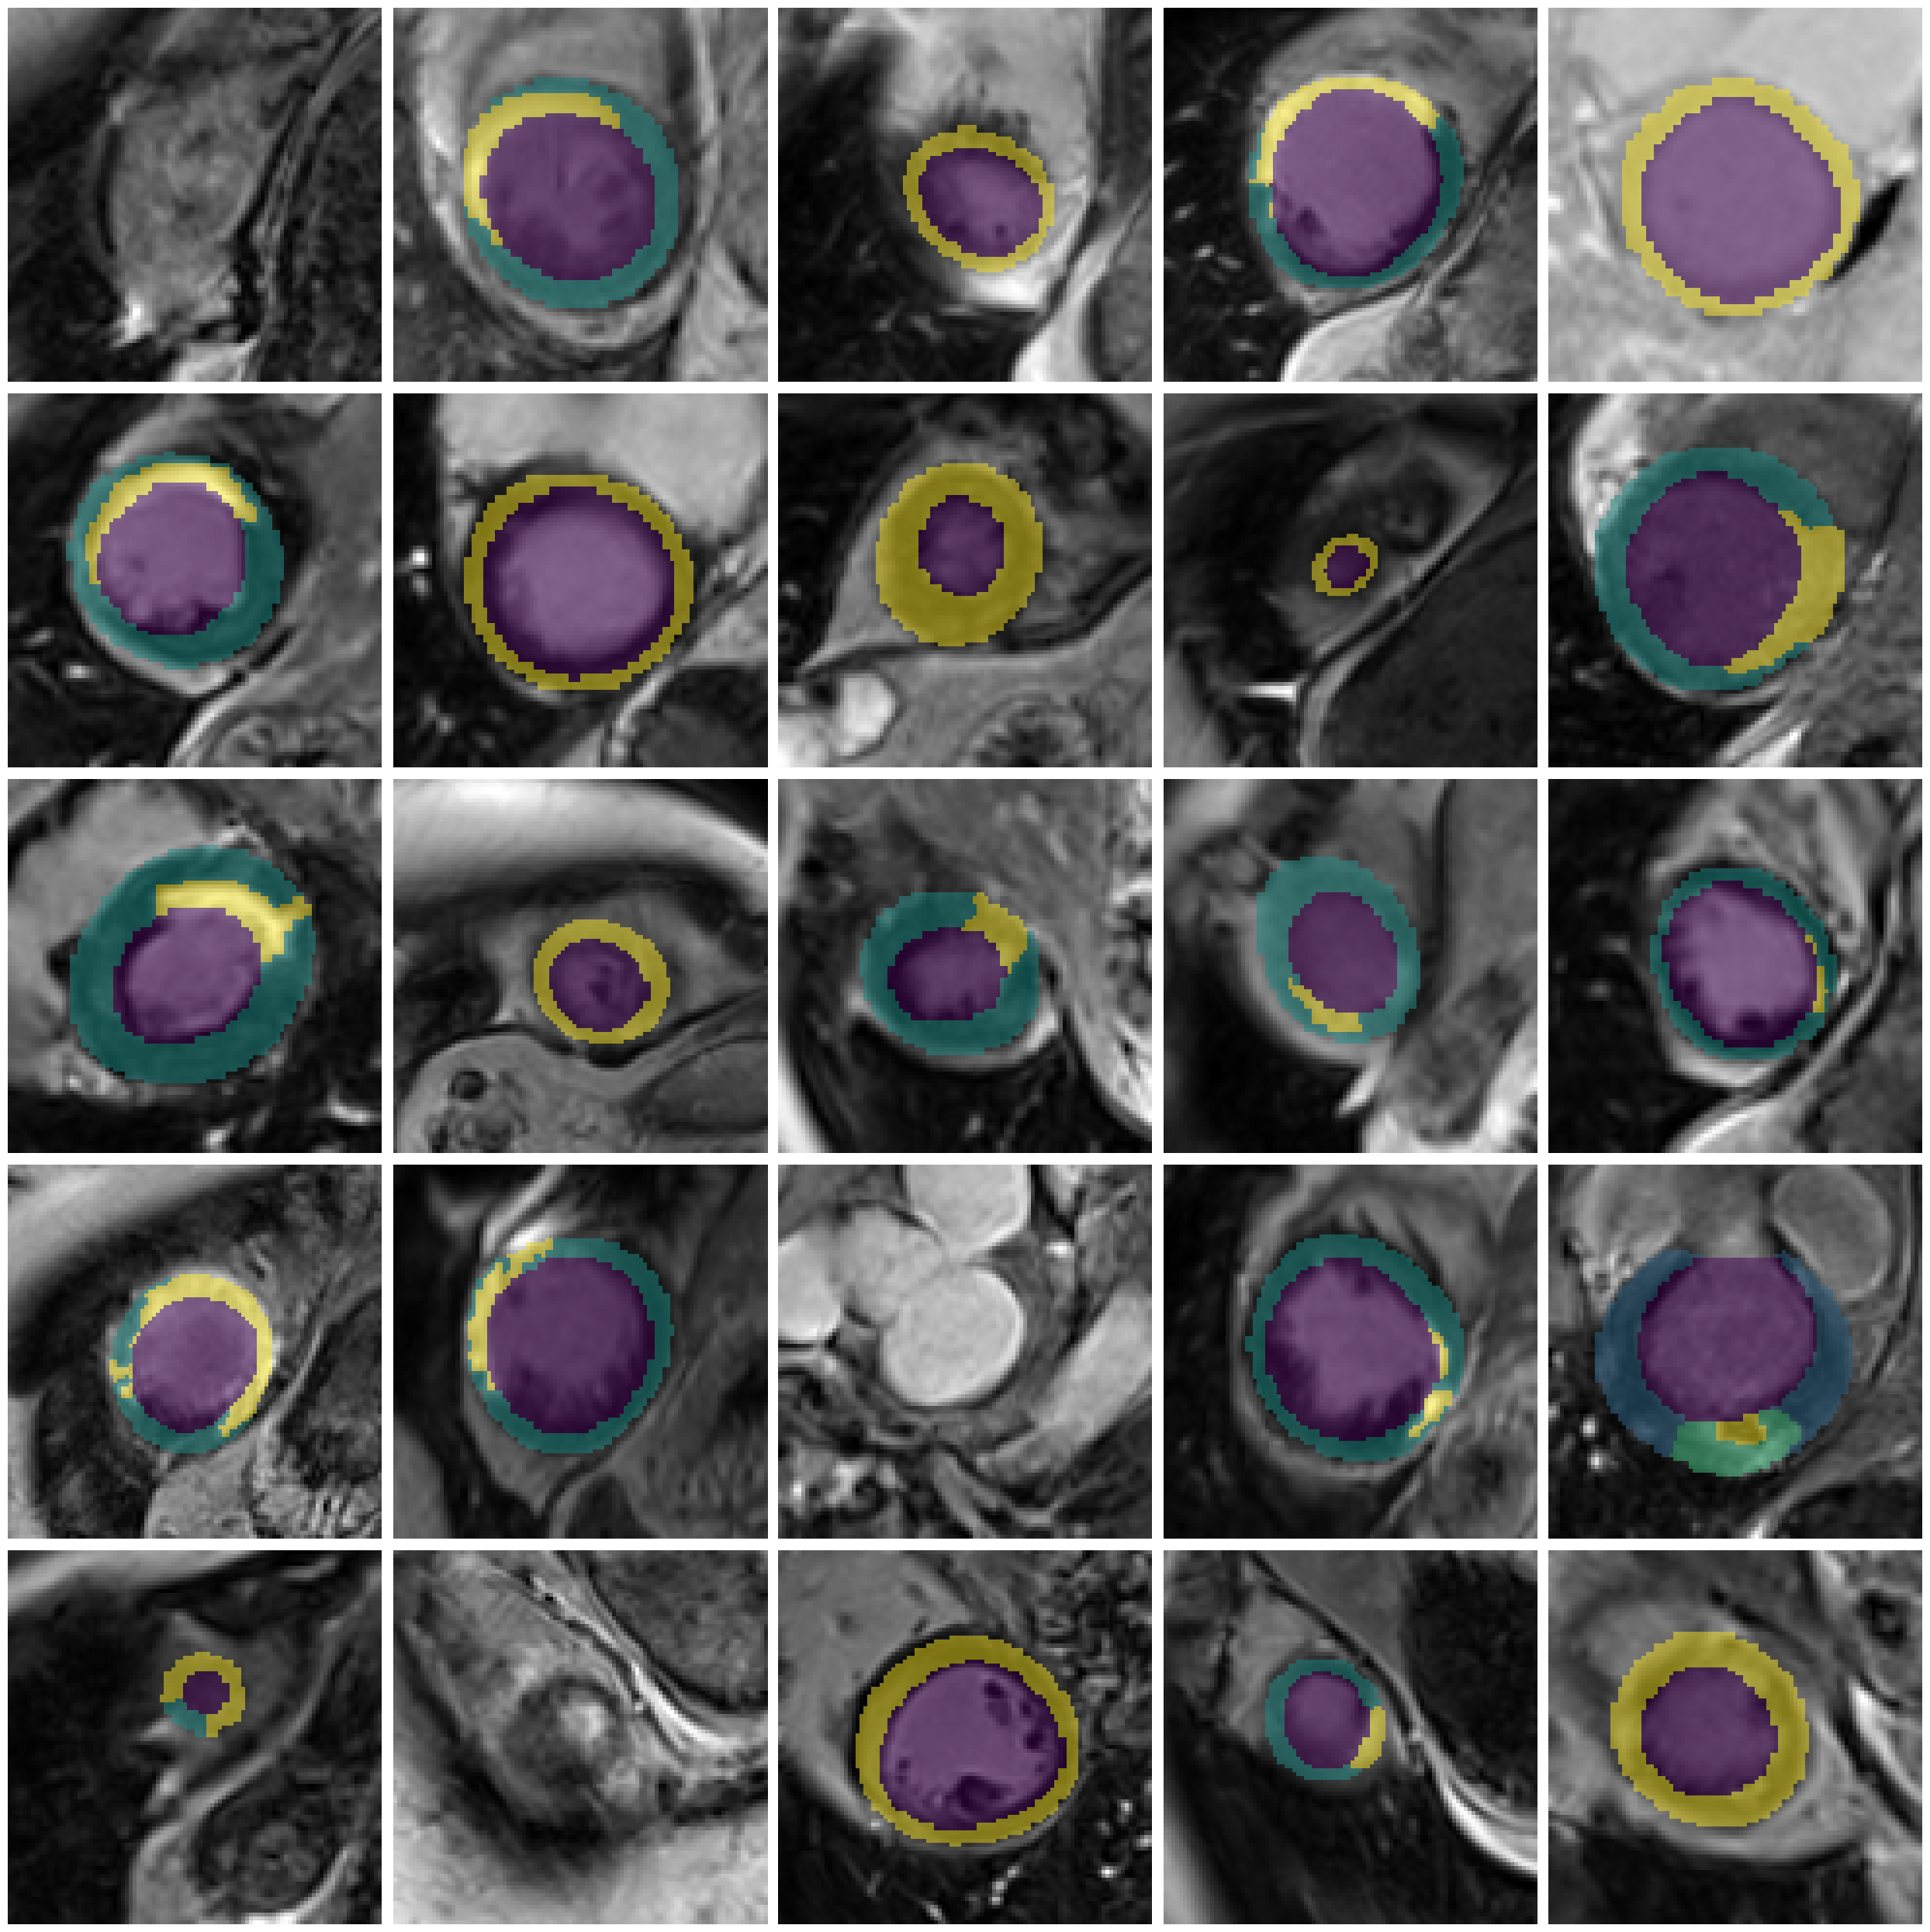

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

r, c = 5, 5
fig = plt.figure(figsize=(5*r, 5*c))
for i in range(r):
    for j in range(c):
        ix = c*i + j
        ax = plt.subplot(r, c, ix + 1)
        ax.imshow(imgs[ix].squeeze(0), cmap="gray")
        mask = torch.argmax(masks[ix], axis=0).float().numpy()
        mask[mask == 0] = np.nan
        ax.imshow(mask, alpha=0.5)
        ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def plot_history(hist):
    graph_ax1.clear()
    graph_ax2.clear()
    graph_ax1.plot(hist['loss'], label='loss')
    graph_ax1.plot(hist['val_loss'], label='val_loss')
    graph_ax2.plot(hist['iou'], label='iou')
    graph_ax2.plot(hist['val_iou'], label='val_iou')
    graph_ax1.legend(loc='upper right')
    graph_ax2.legend(loc='upper right')
    graph_ax1.grid(True)
    graph_ax2.grid(True)
    graph_ax1.set_yscale("log")
    graph_out.update(graph_fig)
    
def IoU(pr, gt, th=0.5, eps=1e-7):
    pr = torch.sigmoid(pr) > th
    gt = gt > th
    intersection = torch.sum(gt * pr, axis=(-2,-1))
    union = torch.sum(gt, axis=(-2,-1)) + torch.sum(pr, axis=(-2,-1)) - intersection + eps
    ious = (intersection + eps) / union
    return torch.mean(ious).item()

In [ ]:
!pip install segmentation_models_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 30.9 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=37ff706cf5f2c3b87d69a78dcac7bce62a3e5e43bcd6a935f937a24a30c6acd8
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=b61b6ab73426c98702fa2fffd050dedff82fdf07ce7a34ec3c2590c8e256ca5f
  Stored in directory: /root/.cache/pip/w

In [ ]:
import segmentation_models_pytorch as smp

model = smp.Unet(
    encoder_name="resnet18",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=1,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=5,                      # model output channels (number of classes in your dataset)
)

output = model(imgs)
output.shape, masks.shape

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 307MB/s]


(torch.Size([25, 5, 96, 96]), torch.Size([25, 5, 96, 96]))

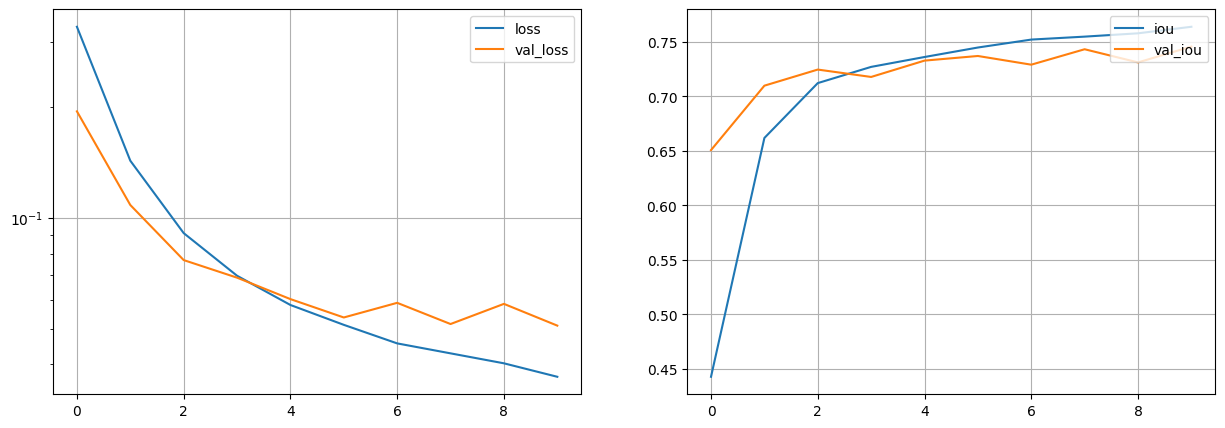

<ipython-input-30-340c1a921701>:34: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = nib.load(f'{self.pathmask}/{patient}').get_fdata()[...,channel].astype(np.int)


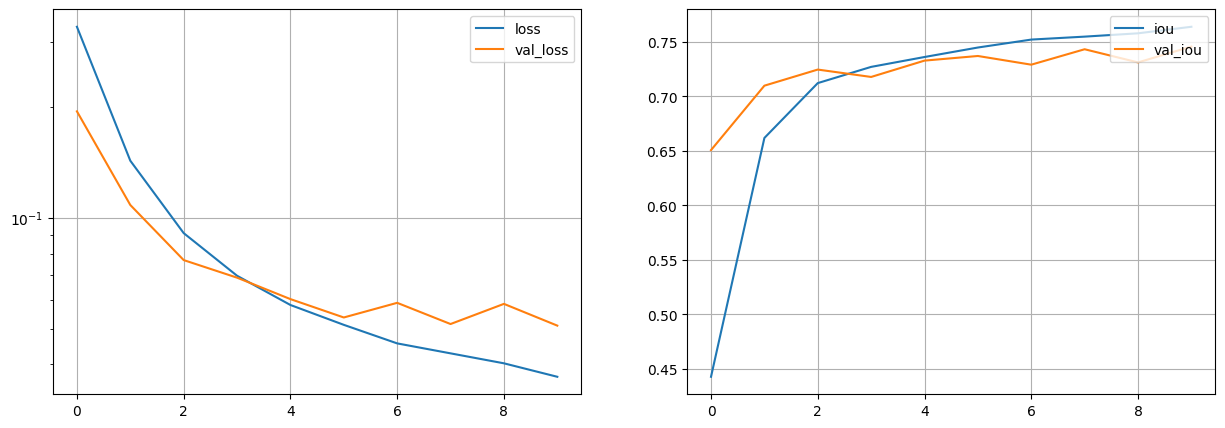

In [ ]:
from fastprogress import master_bar, progress_bar
batch_size=64
dl = {
    'train': torch.utils.data.DataLoader(ds['train'], batch_size=batch_size, shuffle=True, pin_memory=True),
    'val': torch.utils.data.DataLoader(ds['val'], batch_size=batch_size, shuffle=False, pin_memory=True),
}
epochs = 10
lr = 3e-4
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model.cuda()
mb = master_bar(range(1, epochs+1))
graph_fig, (graph_ax1, graph_ax2) = plt.subplots(1, 2, figsize=(15, 5))
graph_out = display(graph_fig, display_id=True)
hist = {'loss': [], 'val_loss': [], 'iou': [], 'val_iou': []}
for e in mb:
    # training
    model.train()
    l, i = [], []
    for batch in progress_bar(dl['train'], parent=mb):
        optimizer.zero_grad()
        imgs, masks = batch
        imgs, masks = imgs.cuda(), masks.cuda()
        preds = model(imgs)
        loss = F.binary_cross_entropy_with_logits(preds, masks)
        loss.backward()
        optimizer.step()
        l.append(loss.item())
        i.append(IoU(preds, masks))
        mb.child.comment = f'training ... loss {np.mean(l):.4f} iou {np.mean(i):.4f}'
    hist['loss'].append(np.mean(l))
    hist['iou'].append(np.mean(i))
    # evaluation
    model.eval()
    vl, vi = [], []
    with torch.no_grad():
        for batch in progress_bar(dl['val'], parent=mb):
            imgs, masks = batch
            imgs, masks = imgs.cuda(), masks.cuda()
            preds = model(imgs)
            loss = F.binary_cross_entropy_with_logits(preds, masks)
            vl.append(loss.item())
            vi.append(IoU(preds, masks))
            mb.child.comment = f'evaluating... loss {np.mean(l):.4f} iou {np.mean(i):.4f} val_loss {np.mean(vl):.4f} val_iou {np.mean(vi):.4f}'
    mb.main_bar.comment = f'Epoch {e}/{epochs} loss {np.mean(l):.4f} val_loss {np.mean(vl):.4f} iou {np.mean(i):.4f} val_iou {np.mean(vi):.4f}'
    hist['val_loss'].append(np.mean(vl))
    hist['val_iou'].append(np.mean(vi))
    plot_history(hist)

In [ ]:
imgs, masks = next(iter(dl['val']))
preds = model.predict(imgs.cuda()).cpu()
    
preds.shape

<ipython-input-30-340c1a921701>:34: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = nib.load(f'{self.pathmask}/{patient}').get_fdata()[...,channel].astype(np.int)


torch.Size([64, 5, 96, 96])

<ipython-input-41-7e1f1d8c313b>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(len(imgs), 2, 2*i + 1)


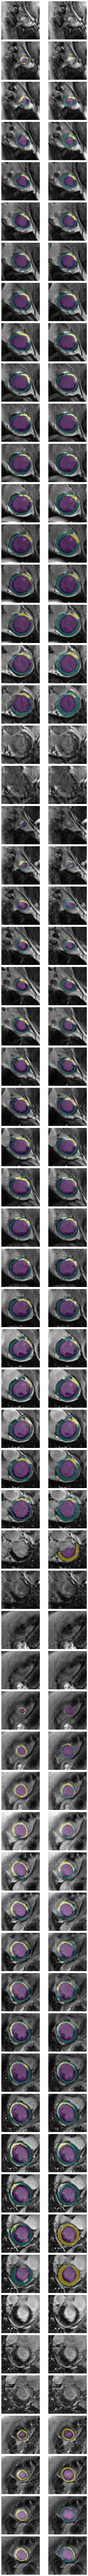

In [ ]:
fig = plt.subplots(figsize=(8, 3*len(imgs)))
for i, (img, mask, pred) in enumerate(zip(imgs, masks, preds)):
    ax = plt.subplot(len(imgs), 2, 2*i + 1)
    ax.imshow(img[0], cmap="gray")
    mask = torch.argmax(mask, axis=0).float().numpy()
    mask[mask == 0] = np.nan
    ax.imshow(mask, alpha=0.5)
    ax.axis('off')
    ax = plt.subplot(len(imgs), 2, 2*i + 2)
    ax.imshow(img[0], cmap="gray")
    pred = torch.argmax(pred, axis=0).float().numpy()
    pred[pred == 0] = np.nan
    ax.imshow(pred, alpha=0.5)
    ax.axis('off')
plt.tight_layout()    
plt.show()

In [42]:
## save the model
torch.save(model.state_dict(), 'checkpoint.pt')

In [43]:
################# load model object
model_loaded = smp.Unet(
    encoder_name="resnet18",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=1,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=5,                      # model output channels (number of classes in your dataset)
)

model_loaded.load_state_dict(torch.load('checkpoint.pt'))
preds = model_loaded.predict(imgs).cpu()
preds.shape

torch.Size([64, 5, 96, 96])

In [44]:
import albumentations as A
resize = A.Resize(96, 96)
import nibabel as nib

In [47]:
img,mask=data_val[0]
img.shape
mask.shape

<ipython-input-30-340c1a921701>:34: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = nib.load(f'{self.pathmask}/{patient}').get_fdata()[...,channel].astype(np.int)


torch.Size([5, 96, 96])

In [74]:
img = nib.load('/content/drive/MyDrive/My_LGE_challenege/dataset_train_test/images/200_M1.nii.gz')
print(img.shape[:2])
img_data = img.get_fdata()
resized = resize(image=img_data)['image']
img_t = torch.from_numpy(resized).float().permute(2,0,1).unsqueeze(1)
img_t.shape
pathdis='/content/drive/MyDrive/My_LGE_challenege'
#mask_resized = np.rint(A.Resize(*img.shape)(image=mask)['image'])[...,None]
with torch.no_grad():
        output = model(img_t.cuda())
        output = torch.sigmoid(output)
        print(output.shape)
masks = torch.argmax(output, axis=1).float().cpu().permute(1,2,0).numpy()
print(masks.shape)
masks_resized = np.rint(A.Resize(*img.shape[:2])(image=masks)['image'])
print(masks_resized.shape)
print(np.unique(masks))
print(np.unique(masks_resized))
nib.save(nib.Nifti1Image(masks_resized, img.affine), os.path.join(pathdis,'test.nii.gz'))

(69, 74)
torch.Size([20, 5, 96, 96])
(96, 96, 20)
(69, 74, 20)
[0. 1. 2. 3.]
[0. 1. 2. 3.]


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


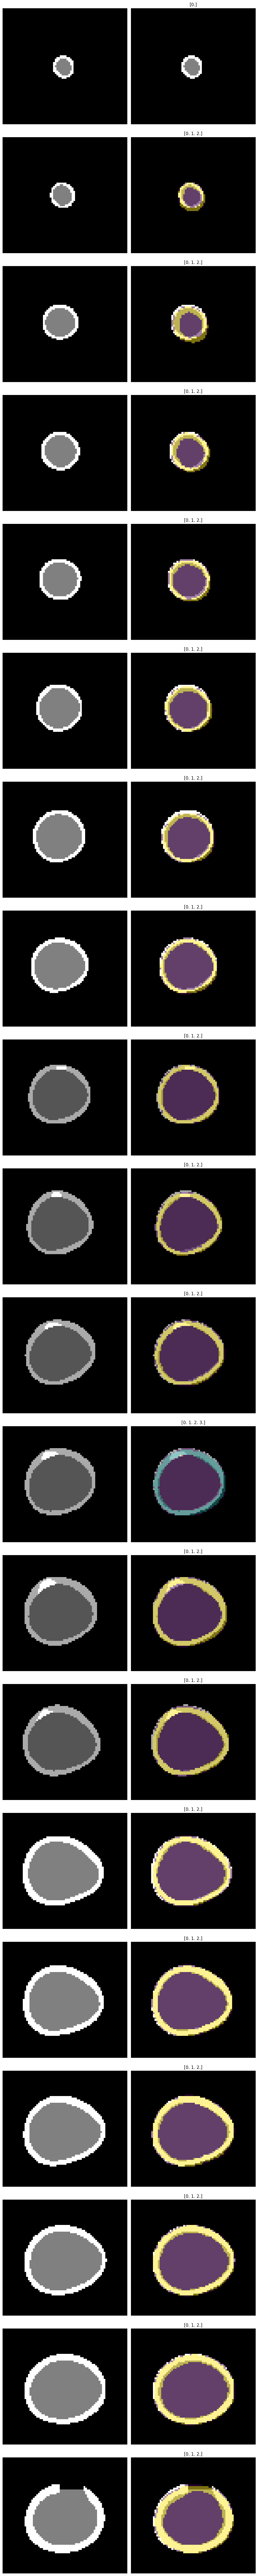

In [75]:
######GT path
es_img = nib.load('/content/drive/MyDrive/My_LGE_challenege/dataset_train_test/labels/200_M1.nii.gz').get_fdata()
channels = es_img.shape[-1]
#################prediction path
es_pred = nib.load('/content/drive/MyDrive/My_LGE_challenege/test.nii.gz').get_fdata()

fig = plt.figure(figsize=(20, channels*5))
for c in range(channels):
    ax = plt.subplot(channels, 4, 4*c + 1)
    ax.imshow(es_img[...,c],cmap='gray')
    ax.axis('off')
    ax = plt.subplot(channels, 4, 4*c + 2)
    ax.imshow(es_img[...,c],cmap='gray')
    mask = es_pred[...,c]
    ax.set_title(np.unique(mask))
    mask[mask == 0] = np.nan
    ax.imshow(mask, alpha=0.5)
    ax.axis('off')
plt.tight_layout()
plt.show()